In [1]:
import os

import matplotlib.pyplot as plt
!pwd
#10 mins training time (local cpu)

/Users/orenkobo/Desktop/PhD/Aim1/Aim1/OutputsAnalyser/ZZZ_notebooks/Notebooks __For_Paper


In [2]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
import datetime
print(datetime.datetime.now())


2022-04-07 10:35:19.447564


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.keras import backend as K
print(K._get_available_gpus())

Num GPUs Available:  0
[]


2022-04-07 10:35:30.765787: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import joblib

import tensorflow as tf
import numpy as np
import datetime
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
scale_col = "x_gaze_location_standard_scaled"

def apply_phq_cutoff(df , neg_phq_cutoff, pos_phq_cutoff):
    df["phq_binary_label"] = [0.0 if x <= neg_phq_cutoff else 1.0 if x >= pos_phq_cutoff else "other" for x in df.phq_score]
    df = df[df.phq_binary_label!= 'other']
    return df


def get_timecols_df_for_DL(fn ="/Users/orenkobo/Desktop/PhD_new/repos/HebLingStudy/notebooks/df.csv",
                           scale_col = scale_col):

    import string, re
    print(f"{datetime.datetime.now()} Reading csv from {fn}")
    df = pd.read_csv(fn,
                     index_col=None,
                     converters={#'alephbert_enc': eval,
                         scale_col : eval,
                         # 'x_gaze_location_minmax_scaled' : eval,
                         # 'x_gaze_location_standard_scaled' : eval,
                         # 'target_word_x_range' : eval
                         # 'phq_label': bool
                     })
    print(df.shape)


    df = df[df.Sentence_type != 'F'].reset_index(drop=True)


    id_cols = ["phq_score","phq_group","Subject", "Sentence_type",
               "sentence_pupil_diameter_mean","set_num"]
    # vec_size = 3500
    # new_colname = f"x_gaze_location_{vec_size}"
    cols = [f"timepoint#{i}" for i in range(875)]
    # df[new_colname] = df["x_gaze_location_standard_scaled"].apply(lambda x : x[:vec_size])
    timeseries_df = pd.DataFrame(data = df[scale_col].to_list() , columns = cols)
    timeseries_df[id_cols] = df[id_cols]
    timeseries_df = timeseries_df.iloc[:,200:]
    cols = [x for x in timeseries_df.columns if "timepoint" in x]
    return timeseries_df, cols

In [6]:
import pandas as pd
d = {}
# df_fn = "/export/home/orenkobo/Aim1/paper_analysis/Artifacts/df_new_full__unsegmented_alldata_new_FINAL_paparanalysis.csv"
df_fn = "/Users/orenkobo/Desktop/PhD/HebLingStudy/ts_data/Artifacts2/df_new_full__unsegmented_alldata_new_FINAL.csv"
# et_scale_col = "x_gaze_location_rescaled"
et_scale_col = "x_gaze_location_standard_scaled"
override_cutoff = [7,8]
df, timepoint_cols = get_timecols_df_for_DL(fn =df_fn, scale_col = scale_col)
df = apply_phq_cutoff(df,
                      neg_phq_cutoff = override_cutoff[0],
                      pos_phq_cutoff = override_cutoff[1])


cond_df = pd.get_dummies(df['Sentence_type'])
cond_cols = cond_df.columns.tolist()
df = pd.concat([df, cond_df],axis=1)
df = df.reset_index(drop=True)
df['encoded_cond'] = LabelEncoder().fit_transform(df['Sentence_type'])

df

2022-04-07 10:35:33.760801 Reading csv from /Users/orenkobo/Desktop/PhD/HebLingStudy/ts_data/Artifacts2/df_new_full__unsegmented_alldata_new_FINAL.csv
(9696, 31)


,timepoint#200,timepoint#201,timepoint#202,timepoint#203,timepoint#204,timepoint#205,timepoint#206,timepoint#207,timepoint#208,timepoint#209,...,Subject,Sentence_type,sentence_pupil_diameter_mean,set_num,phq_binary_label,A,B,C,D,encoded_cond
0,1.249265,1.243258,1.251267,1.258274,1.247262,1.240255,1.239254,1.251267,1.243258,1.240255,...,3,A,5110.630668,17,0.0,1,0,0,0,0
1,-0.605616,-0.604615,-0.602613,-0.590601,-1.061078,-1.648674,-1.700727,-1.695722,-1.703730,-1.710737,...,3,B,4974.146741,5,0.0,0,1,0,0,1
2,0.127175,0.133185,0.121164,0.099127,0.104136,0.115154,0.122166,0.124169,0.135188,0.161232,...,3,D,4739.278462,12,0.0,0,0,0,1,3
3,-1.144817,-1.155843,-1.149829,-1.117755,-1.106730,-1.129783,-1.135797,-1.111741,-1.109737,-1.127778,...,3,A,4775.260020,6,0.0,1,0,0,0,0
4,-1.554761,-1.571787,-1.577796,-1.608843,-1.600831,-1.571787,-1.558767,-1.560770,-1.565778,-1.573790,...,3,B,4746.720839,26,0.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,-1.686295,-1.706332,-1.697315,-2.352532,-2.500808,-2.447709,-2.421661,-2.419657,-2.425668,-2.450715,...,139,D,5117.994088,0,1.0,0,0,0,1,3
3228,0.986135,0.998149,0.987137,0.977125,0.984133,0.992142,0.991141,0.995146,0.976124,0.978126,...,139,D,4995.187626,15,1.0,0,0,0,1,3
3229,1.003421,1.015438,0.504710,0.345483,0.339475,0.340476,0.351492,0.363509,0.364510,0.377529,...,139,A,4934.199434,27,1.0,1,0,0,0,0
3230,1.746672,1.754684,1.759692,1.738660,1.737658,1.736657,1.737658,1.742666,1.323024,1.368093,...,139,C,5056.427875,4,1.0,0,0,1,0,2


In [7]:
print(df[timepoint_cols].shape)
print(df[timepoint_cols].dropna().shape)
df[timepoint_cols] = df[timepoint_cols].ffill()
print(df[timepoint_cols].shape)

(3232, 675)
(1427, 675)
(3232, 675)


In [8]:
def generate_3d_ds(df, feats = timepoint_cols):
    data_3d = []

    labels = []
    # print(f"{datetime.datetime.now()} - DS generated Start")
    for idx , row in df.iterrows():
        # if (idx % 500) == 0:
        #     print(idx)
        l = []
        for col in feats:
            l.append([row[col]] + [row['encoded_cond']])
        data_3d.append(l)
        labels.append(row["phq_binary_label"])
    X_input = np.asarray(data_3d)
    X_input_reshaped = np.swapaxes(X_input,1,2)
    # print(f"{datetime.datetime.now()} - DS generated Done")

    return X_input_reshaped, labels


In [9]:
def calc_per_subj_pred(pred, n=32):
    if type(pred) != list:
        pred = [x[0] for x in pred]
    c = [pred[i * n:(i + 1) * n] for i in range((len(pred) + n - 1) // n )]
    l = pd.DataFrame(c).mean(axis=1)
    return l

In [10]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=16, restore_best_weights=True)]

def train_fold(X_train, y_train, X_val, y_val, voc_size=4):

    inp1 = layers.Input(shape=(1, 675))  # TensorShape([None, 2, 100])
    inp2 = layers.Input(shape=(1, 675))  # TensorShape([None, 1, 100])
    x2 = layers.Embedding(input_dim=voc_size, output_dim=8)(inp2)  # TensorShape([None, 1, 100, 8])
    x2_reshaped = tf.transpose(tf.squeeze(x2, axis=1), [0, 2, 1])  # TensorShape([None, 8, 100])
    x = layers.concatenate([inp1, x2_reshaped], axis=1)
    x = layers.LSTM(32, activation='relu',
                    # kernel_regularizer=tf.keras.regularizers.l1(0.001),
                    activity_regularizer=tf.keras.regularizers.l1(0.01)
                    )(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(8, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.01),
                    activity_regularizer=tf.keras.regularizers.l2(0.01)
                    )(x)
    x = layers.Dropout(0.25)(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[inp1, inp2], outputs=[x])

    print("A1 : ", datetime.datetime.now())
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
        loss='binary_crossentropy',
        optimizer=opt,
        metrics=['acc']
    )

    train_inp_gaze = X_train[:, :1, :]
    train_inp_cond = X_train[:, 1:, :]
    val_inp_gaze = X_val[:, :1, :]
    val_inp_cond = X_val[:, 1:, :]



    his = model.fit(epochs=20,
              x=[train_inp_gaze, train_inp_cond], y=np.array(y_train).astype('float'),
              validation_data = ([val_inp_gaze, val_inp_cond], np.array(y_val).astype('float')),
                    callbacks = callbacks)
    return model


In [32]:
from numpy.random import seed
import tensorflow as tf
import keras
import random

random.seed(5)
np.random.seed(5)
tf.random.set_seed(5)
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed

In [74]:
from sklearn.utils import shuffle
from sklearn.model_selection import GroupShuffleSplit, LeavePGroupsOut
num_iters = 500
n_test_subjs = 10

def rl(df):
    ids = df["Subject"].unique()
    random.shuffle(ids)
    df = df.set_index("Subject").loc[ids].reset_index()
    return df

def run_model(df, randomize_labels = False):
    # lpgo1 = LeavePGroupsOut(n_groups=10)
    res_dict = {}
    i = 0

    lpgo1 = GroupShuffleSplit(n_splits=num_iters, test_size=n_test_subjs, random_state=7)
    print(f"{datetime.datetime.now()} : Start")

    if randomize_labels:
        df = rl(df)
    groups1 = df['Subject']

    for tmp_index, test_index in lpgo1.split(X = df[timepoint_cols] , y = df['phq_binary_label'], groups = groups1):
        if i==num_iters:
            break
        res_dict[i] = {}

        lpgo2 = LeavePGroupsOut(n_groups=n_test_subjs)
        # q = lpgo2.get_n_splits(groups = df.Subject)
        # print(q)
        # return
        # lpgo2 = GroupShuffleSplit(n_splits=num_iters, test_size=n_test_subjs, random_state=i)
        test_subjects = list(np.unique(groups1.iloc[test_index]))
        test_df = df.iloc[test_index]
        tmp_df = df.iloc[tmp_index]
        groups2 = tmp_df['Subject']
        # print(f"{groups1.iloc[tmp_index].nunique()} temp subjects :  {list(np.unique(groups1.iloc[tmp_index]))}")
        # folds = list(lpgo2.split(X = tmp_df[timepoint_cols] ,
        #                     y = tmp_df['phq_binary_label'],
        #                     groups = groups2))
        # X_shuffled, y_shuffled, groups_shuffled = shuffle(tmp_df[timepoint_cols] ,
        #                                                   tmp_df['phq_binary_label'] ,
        #                                                   groups2, random_state=0)
        # folds = lpgo2.split(X = X_shuffled[timepoint_cols] ,
        #                     y = y_shuffled,
        #                     groups = groups_shuffled)
        folds = lpgo2.split(X = tmp_df[timepoint_cols] ,
                            y = tmp_df['phq_binary_label'],
                            groups = groups2)
        print("a")
        train_index, val_index = next(folds)
        train_subjects = list(np.unique(groups2.iloc[train_index]))
        val_subjects = list(np.unique(groups2.iloc[val_index]))
        train_df = tmp_df.iloc[train_index]
        val_df = tmp_df.iloc[val_index]
        # for fold_i, (train_index, val_index) in enumerate(folds):
            # train_subjects = list(np.unique(groups2.iloc[train_index]))
            # val_subjects = list(np.unique(groups2.iloc[val_index]))
            # train_df = tmp_df.iloc[train_index]
            # val_df = tmp_df.iloc[val_index]
            # break
        X_train, y_train = generate_3d_ds(train_df)
        X_test, y_test = generate_3d_ds(test_df)
        X_val, y_val = generate_3d_ds(val_df)

        print(f"{datetime.datetime.now(): Train Fold #{i}}")
        assert ( len(list(set(train_subjects) & set(test_subjects))) == 0)
        assert ( len(list(set(val_subjects) & set(test_subjects))) == 0)
        assert ( len(list(set(val_subjects) & set(train_subjects))) == 0)
        fold_model = train_fold(X_train, y_train, X_val, y_val)
        fold_eval = fold_model.evaluate([X_test[:, :1, :], X_test[:, 1:, :]], np.array(y_test).astype('float'))
        fold_test_pred = fold_model.predict([X_test[:, :1, :], X_test[:, 1:, :]])
        print("Test eval is " , fold_eval)
        res_dict[i]["eval"] = fold_eval[1]
        res_dict[i]["test_subjects"] = test_subjects
        res_dict[i]["train_subjects"] = train_subjects
        res_dict[i]["val_subjects"] = val_subjects
        res_dict[i]["test_pred"] = [x[0] for x in fold_test_pred]
        res_dict[i]["test_true"] = list(np.array(y_test).astype('float'))
        print("Shape of pred is " , fold_test_pred.shape)
        res_dict[i]["per_subject_mean_pred"] = calc_per_subj_pred(fold_test_pred)
        print("Shape of per_subject_mean_pred" , res_dict[i]["per_subject_mean_pred"].shape)
        res_dict[i]["per_subject_mean_label"] = calc_per_subj_pred(y_test)
        res_dict[i]["per_subject_is_success"] = [True if round(p)==round(t) else False for p,t in
                                                 zip(res_dict[i]["per_subject_mean_pred"],
                                                     res_dict[i]["per_subject_mean_label"])]
        res_dict[i]["subj_level_acc"] = sum(res_dict[i]["per_subject_is_success"]) / len(res_dict[i]["per_subject_is_success"])
        print(f"{datetime.datetime.now()}: Finished Train Fold #{i}/{num_iters} - thus far subj acc is "
              f"{np.mean([res_dict[x]['subj_level_acc'] for x in range(i)])} and regular acc is"
              f"{np.mean([res_dict[x]['eval'] for x in range(i)])}\n Randomize Labels = {randomize_labels}")
        i+=1
    return res_dict



In [82]:
model_res_dict_new = run_model(df)

2022-04-07 21:45:18.076710 : Start
a
 Train Fold #0
A1 :  2022-04-07 21:45:42.884899
Epoch 1/20
81/81 [==============================] - 2s 10ms/step - loss: 0.8018 - acc: 0.5170 - val_loss: 0.7701 - val_acc: 0.5031
Epoch 2/20
81/81 [==============================] - 1s 7ms/step - loss: 0.7480 - acc: 0.5305 - val_loss: 0.7350 - val_acc: 0.4469
Epoch 3/20
81/81 [==============================] - 1s 8ms/step - loss: 0.7186 - acc: 0.5463 - val_loss: 0.7220 - val_acc: 0.4437
Epoch 4/20
81/81 [==============================] - 1s 7ms/step - loss: 0.6884 - acc: 0.5829 - val_loss: 0.7463 - val_acc: 0.4625
Epoch 5/20
81/81 [==============================] - 1s 7ms/step - loss: 0.6672 - acc: 0.6161 - val_loss: 0.8169 - val_acc: 0.4375
Epoch 6/20
81/81 [==============================] - 1s 7ms/step - loss: 0.6409 - acc: 0.6582 - val_loss: 0.7793 - val_acc: 0.4875
Epoch 7/20
81/81 [==============================] - 1s 7ms/step - loss: 0.6256 - acc: 0.6647 - val_loss: 0.8294 - val_acc: 0.5031
Epoc

/Users/orenkobo/Desktop/PhD/Aim1/Aim1/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/orenkobo/Desktop/PhD/Aim1/Aim1/venv/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 Train Fold #1
A1 :  2022-04-07 21:46:20.570563
Epoch 1/20
81/81 [==============================] - 2s 11ms/step - loss: 0.7848 - acc: 0.5405 - val_loss: 0.7610 - val_acc: 0.5000
Epoch 2/20
81/81 [==============================] - 1s 7ms/step - loss: 0.7326 - acc: 0.5432 - val_loss: 0.7363 - val_acc: 0.5000
Epoch 3/20
81/81 [==============================] - 1s 7ms/step - loss: 0.7024 - acc: 0.5421 - val_loss: 0.7248 - val_acc: 0.5000
Epoch 4/20
81/81 [==============================] - 1s 7ms/step - loss: 0.6844 - acc: 0.5436 - val_loss: 0.7254 - val_acc: 0.5000
Epoch 5/20
81/81 [==============================] - 1s 7ms/step - loss: 0.6719 - acc: 0.5517 - val_loss: 0.7133 - val_acc: 0.4719
Epoch 6/20
81/81 [==============================] - 1s 8ms/step - loss: 0.6612 - acc: 0.6030 - val_loss: 0.7246 - val_acc: 0.5094
Epoch 7/20
81/81 [==============================] - 1s 7ms/step - loss: 0.6441 - acc: 0.6454 - val_loss: 0.7398 - val_acc: 0.5406
Epoch 8/20
81/81 [=======================

KeyboardInterrupt: 

In [81]:
import datetime
out_dir = "/Users/orenkobo/Desktop/PhD/Aim1/Aim1/OutputsAnalyser/ZZZ_notebooks/Notebooks __For_Paper/Trained_models/"
ts = datetime.datetime.timestamp(datetime.datetime.now())

out_fn = f"{out_dir}LSTM_cond_embed_output_object_{ts}"
print(np.mean([random_model_res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([random_model_res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

random_dict_to_save = {"res_dict" : random_model_res_dict, f"details" : f"LSTM + cond embed, {num_iters} iters, "
                                                                 f"{100-2*n_test_subjs}/{n_test_subjs}/{n_test_subjs} split"}
joblib.dump(random_dict_to_save, out_fn + "_RANDOM_FINAL.jbl")
print("Saved to ", out_fn)

0.45234375132620336
0.4528
Saved to  /Users/orenkobo/Desktop/PhD/Aim1/Aim1/OutputsAnalyser/ZZZ_notebooks/Notebooks __For_Paper/Trained_models/LSTM_cond_embed_output_object_1649356410.032912


In [ ]:
model_res_dict = run_model(df, randomize_labels = False)
print(np.mean([model_res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([model_res_dict[i]['subj_level_acc'] for i in range(num_iters)]))


In [25]:
print(datetime.datetime.now())
print(f"{n_test_subjs} subjects : ")
print(np.mean([model_res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([model_res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

print(np.mean([random_model_res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([random_model_res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

2022-04-05 21:07:09.097180
10 subjects : 
0.5169312510490417
0.6327999999999999
0.5183187496662139
0.679


In [ ]:
#This is around 10 mins local CPU time
# tf.keras.utils.plot_model(fold_model)

In [ ]:
import datetime
print(datetime.datetime.now())

In [65]:
import joblib
from datetime import datetime

# out_dir = "/export/home/orenkobo/Aim1/paper_analysis/Trained_models/"
out_dir = "/Users/orenkobo/Desktop/PhD/Aim1/Aim1/OutputsAnalyser/ZZZ_notebooks/Notebooks __For_Paper/Trained_models/"
ts = datetime.timestamp(datetime.now())

out_fn = f"{out_dir}LSTM_cond_embed_output_object_{ts}"
model_dict_to_save = {"res_dict" : model_res_dict, f"details" : f"LSTM + cond embed, {num_iters} iters, "
                                                                                  f"{100-2*n_test_subjs}/{n_test_subjs}/{n_test_subjs} split"}

random_dict_to_save = {"res_dict" : model_res_dict, f"details" : f"LSTM + cond embed, {num_iters} iters, "
                                                                f"{100-2*n_test_subjs}/{n_test_subjs}/{n_test_subjs} split"}
joblib.dump(model_dict_to_save, out_fn + ".jbl")
joblib.dump(random_dict_to_save, out_fn + "_RANDOM_.jbl")

['/Users/orenkobo/Desktop/PhD/Aim1/Aim1/OutputsAnalyser/ZZZ_notebooks/Notebooks __For_Paper/Trained_models/LSTM_cond_embed_output_object_1649259787.042902_RANDOM_.jbl']

10 subjects : 
0.5257812511175871
0.5910000000000001


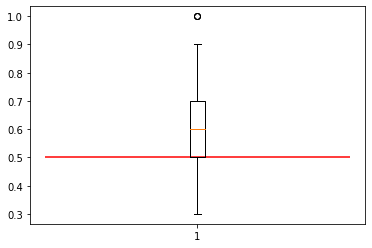

In [30]:
import matplotlib.pyplot as plt
plt.boxplot([model_res_dict[i]['subj_level_acc'] for i in range(num_iters)])
plt.hlines(y= 0.5, xmin=-0.5, xmax=2.5, color='r')

In [27]:
import numpy as np
accs_l = [res_dict[i]['subj_level_acc'] for i in range(num_iters)]
iter_idx = np.argmax(accs_l)
max_acc = accs_l[iter_idx]
max_entry = res_dict[iter_idx]
me_pred = max_entry['test_pred']
me_true = max_entry['test_true']
# pr_curve =

In [24]:
accs_l

[0.6, 0.5, 0.3, 0.5, 0.2, 0.5, 0.5, 0.4, 0.5, 0.4, 0.2, 0.4, 0.6, 0.5, 0.4]

In [23]:
max_entry

{'eval': 0.565625011920929,
 'test_subjects': [42, 46, 71, 72, 77, 87, 112, 113, 115, 118],
 'test_pred': [0.48230875,
  0.48124906,
  0.4820729,
  0.4774221,
  0.4886419,
  0.49888575,
  0.4848336,
  0.48713756,
  0.5021649,
  0.49008733,
  0.48217878,
  0.48918596,
  0.4774221,
  0.49001223,
  0.49471372,
  0.4763323,
  0.48249832,
  0.4937589,
  0.49548006,
  0.4894247,
  0.48209438,
  0.48737174,
  0.48167762,
  0.4811987,
  0.4939257,
  0.50071406,
  0.48660085,
  0.5049589,
  0.48219803,
  0.48782516,
  0.5036337,
  0.49095315,
  0.475376,
  0.48002985,
  0.4829871,
  0.4935801,
  0.4958365,
  0.49074212,
  0.4758829,
  0.5036206,
  0.49155834,
  0.477399,
  0.48827544,
  0.48351577,
  0.483939,
  0.48498943,
  0.48361513,
  0.49613386,
  0.48224726,
  0.4795423,
  0.47612494,
  0.4733184,
  0.47716707,
  0.48361415,
  0.4815199,
  0.4815635,
  0.49106902,
  0.4732568,
  0.49880135,
  0.48180696,
  0.4776491,
  0.4795455,
  0.49229872,
  0.4784392,
  0.4732043,
  0.47201592,
  0.

In [13]:
print(f"{n_test_subjs} subjects : ")
print(np.mean([res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

15 subjects : 
0.47236111561457317
0.4400000000000001


In [14]:
print(f"{n_test_subjs} subjects : ")
print(np.mean([res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

15 subjects : 
0.47236111561457317
0.4400000000000001


In [15]:
print(np.mean([res_dict[i]['eval'] for i in range(num_iters)]))
print(np.mean([res_dict[i]['subj_level_acc'] for i in range(num_iters)]))

0.47236111561457317
0.4400000000000001


In [32]:
accs = [res_dict[i]['subj_level_acc'] for i in range(num_iters)]
np.mean(accs)

0.42000000000000004

<AxesSubplot:>

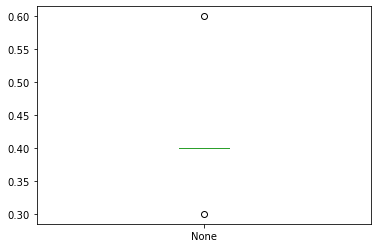

In [33]:
pd.Series(accs).plot.box()

In [67]:
my_list = res_dict[0]["test_pred"]
n=32
c = [my_list[i * n:(i + 1) * n] for i in range((len(my_list) + n - 1) // n )]
# pd.DataFrame(c).mean(axis=1)
c

ModuleNotFoundError: No module named 'pydev_jupyter_utils'

In [34]:
res_dict[0]

{'trained_model': <keras.engine.functional.Functional at 0x7f05c3565e50>,
 'eval': [2.9418864250183105, 0.5062500238418579],
 'test_subjects': [3, 4, 5, 7, 8, 10, 11, 12, 14, 17],
 'test_pred': [0.9801324,
  0.18567377,
  0.0018174648,
  0.98344004,
  0.007769376,
  0.99987125,
  0.034465462,
  0.99916315,
  1.0,
  0.007850051,
  0.9815106,
  0.0023913085,
  0.21883637,
  0.99998915,
  0.6335065,
  0.7504558,
  0.020567805,
  0.99987125,
  0.9999963,
  0.99977696,
  0.9954214,
  0.99954927,
  0.26483133,
  0.99998915,
  0.0026150048,
  0.0004156232,
  0.71710795,
  0.045108587,
  0.061918616,
  7.490967e-09,
  0.99999964,
  0.9920317,
  0.99999976,
  0.99999833,
  0.99928653,
  0.99998736,
  0.9987761,
  0.99719024,
  0.9999993,
  0.53705937,
  0.036192656,
  0.8326241,
  0.0036028922,
  0.5821448,
  0.00085666776,
  0.67734444,
  0.9996289,
  0.0023396313,
  0.5051429,
  0.033452243,
  0.7457353,
  0.9498471,
  0.9971754,
  0.9999963,
  0.63609505,
  0.99969304,
  0.98896587,
  0.0006

In [20]:
d = res_dict[0]
d
# [my_list[i * n:(i + 1) * n] for i in range((len(my_list) + n - 1) // n )]

{'trained_model': <keras.engine.functional.Functional at 0x7f05c3f7b490>,
 'eval': [2.7362866401672363, 0.5062500238418579],
 'test_subjects': [3, 4, 5, 7, 8, 10, 11, 12, 14, 17],
 'test_pred': array([[5.53763807e-02],
        [2.45020866e-01],
        [8.00483048e-01],
        [9.99991000e-01],
        [9.65194285e-01],
        [9.99998510e-01],
        [8.68622899e-01],
        [4.84111935e-01],
        [9.89645600e-01],
        [2.20747322e-01],
        [2.84206271e-02],
        [3.55777025e-01],
        [3.58823329e-01],
        [9.95826960e-01],
        [5.38711011e-01],
        [9.99875784e-01],
        [4.73260880e-04],
        [9.99998510e-01],
        [7.09101021e-01],
        [2.48587936e-01],
        [9.99034524e-01],
        [9.90540504e-01],
        [2.76880741e-01],
        [9.95826960e-01],
        [6.65986538e-02],
        [6.61595881e-01],
        [9.98688817e-01],
        [3.21209431e-04],
        [9.15743053e-01],
        [2.11732537e-01],
        [9.97453213e-01],
 

In [18]:
res_dict[0]

{'trained_model': <keras.engine.functional.Functional at 0x7f05c3f7b490>,
 'eval': [2.7362866401672363, 0.5062500238418579],
 'test_subjects': [3, 4, 5, 7, 8, 10, 11, 12, 14, 17],
 'test_pred': array([[5.53763807e-02],
        [2.45020866e-01],
        [8.00483048e-01],
        [9.99991000e-01],
        [9.65194285e-01],
        [9.99998510e-01],
        [8.68622899e-01],
        [4.84111935e-01],
        [9.89645600e-01],
        [2.20747322e-01],
        [2.84206271e-02],
        [3.55777025e-01],
        [3.58823329e-01],
        [9.95826960e-01],
        [5.38711011e-01],
        [9.99875784e-01],
        [4.73260880e-04],
        [9.99998510e-01],
        [7.09101021e-01],
        [2.48587936e-01],
        [9.99034524e-01],
        [9.90540504e-01],
        [2.76880741e-01],
        [9.95826960e-01],
        [6.65986538e-02],
        [6.61595881e-01],
        [9.98688817e-01],
        [3.21209431e-04],
        [9.15743053e-01],
        [2.11732537e-01],
        [9.97453213e-01],
 